In [1]:
import pandas as pd
import numpy as np
import os
import sklearn as sk

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"C:\Users\ARPIT SHARMA\Desktop\lgm\LGMVIP--DataScience-Iris-flower-classification-ML-1\iris dataset")
files=os.listdir(r"C:\Users\ARPIT SHARMA\Desktop\lgm\LGMVIP--DataScience-Iris-flower-classification-ML-1\iris dataset")


In [4]:
files

['bezdekIris.data', 'Index', 'iris.data', 'iris.names']

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


["sepal length","sepal width","petal length","petal width"]

In [5]:
iris_data=pd.read_csv("iris.data",names=["sepal_length","sepal_width","petal_length","petal_width","type"])

In [6]:
bIris_data=pd.read_csv("bezdekIris.data",names=["sepal length","sepal width","petal length","petal width","type"])

In [7]:
iris_data.shape

(150, 5)

In [8]:
bIris_data.shape

(150, 5)

    1. Identification of variables and data types

In [9]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
type             object
dtype: object

In [10]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   type          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


    2. Understanding the feature Variables(Trian-Test)

In [11]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
bIris_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


CONCLUDING THAT THE DATA IS CLEAN AND SAME IN iris_data and bIris_data

    3. Analyzing the basic matrix

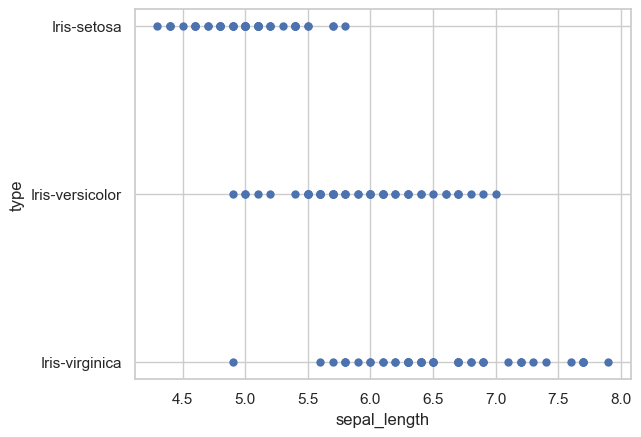

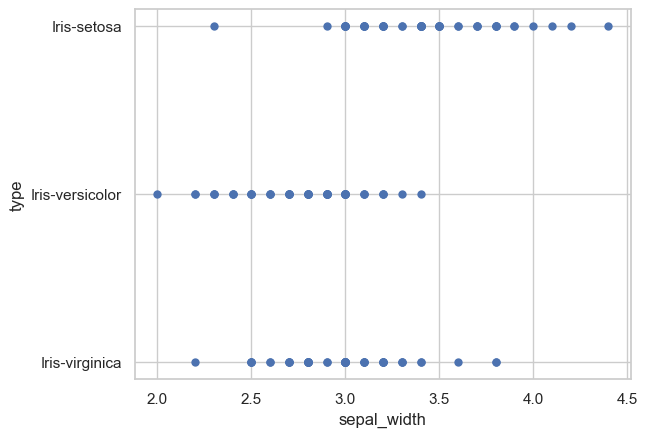

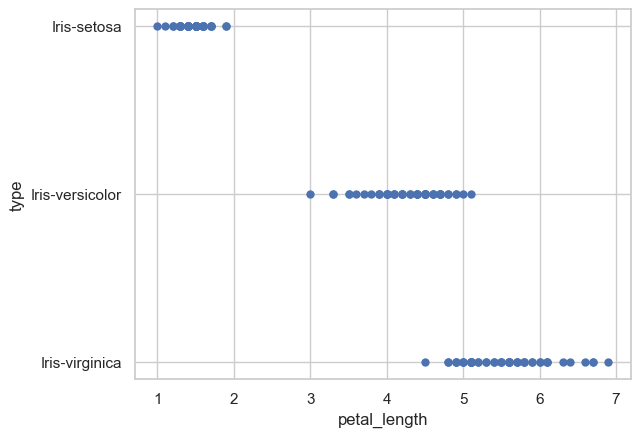

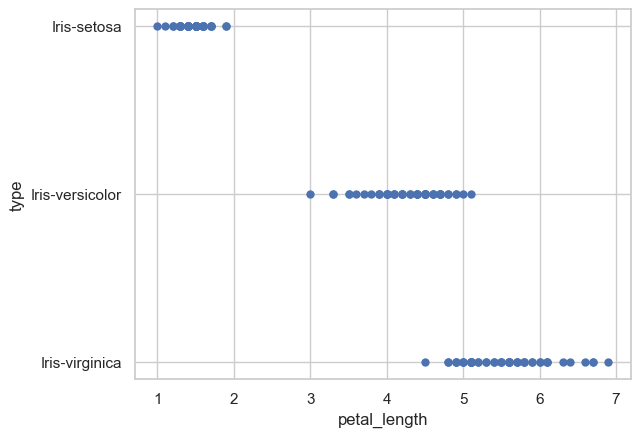

In [13]:


sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
df= iris_data

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset

sns.scatterplot(x=df["sepal_length"], y=df["type"],
                sizes=(1, 8), linewidth=0,
                data=df)
plt.show()
sns.scatterplot(x=df["sepal_width"], y=df["type"],
                sizes=(1, 8), linewidth=0,
                data=df)
plt.show()
sns.scatterplot(x=df["petal_length"], y=df["type"],
                sizes=(1, 8), linewidth=0,
                data=df)
plt.show()
sns.scatterplot(x=df["petal_length"], y=df["type"],
                sizes=(1, 8), linewidth=0,
                data=df)
plt.show()

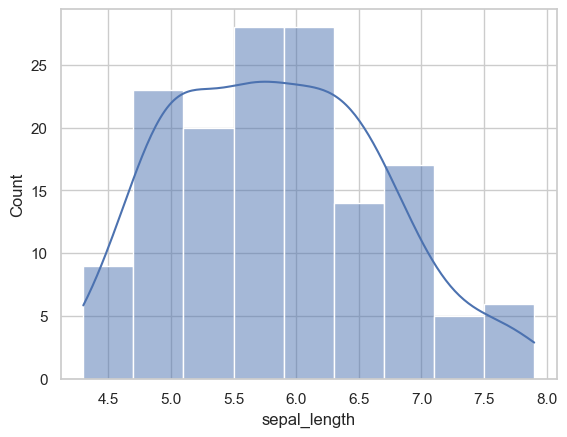

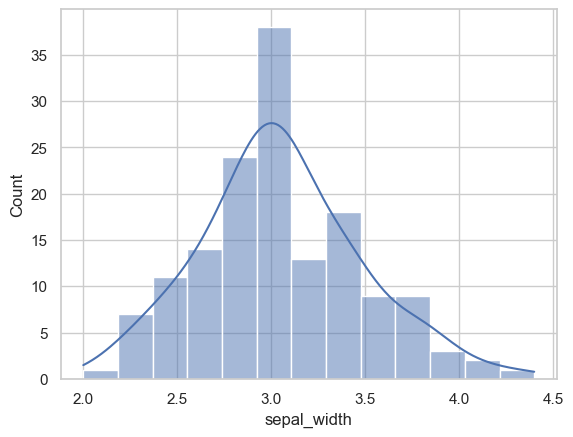

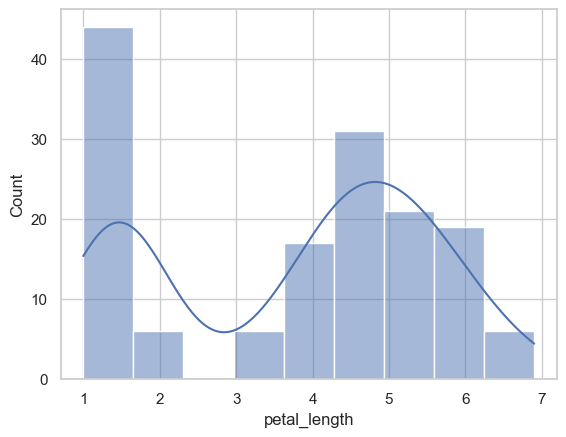

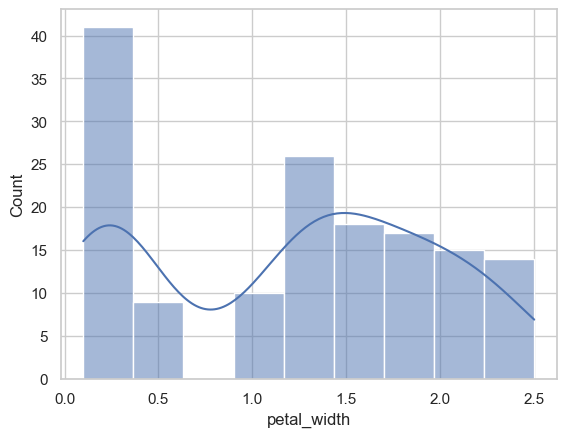

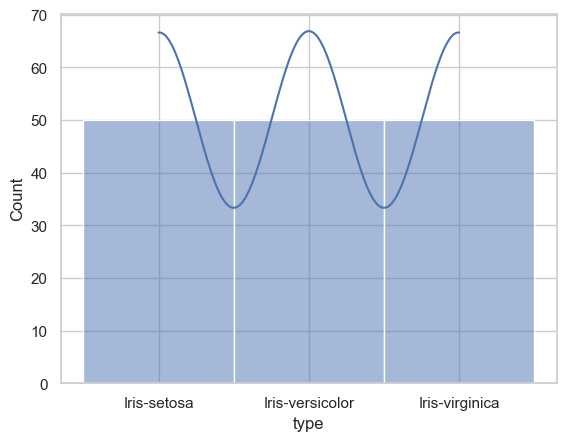

In [14]:
for col in iris_data.columns:
    sns.histplot(iris_data[col], kde=True)  # Change the column index for different features
    plt.show()

In [15]:
#example
#def split_train_test(data,test_ratio):
#    np.random.seed(42)
#   shuffled=np.random.permutation(len(data))
#    print(shuffled)
#   test_set_size=int(len(data)*test_ratio)
#   test_indices=shuffled[:test_set_size]
#   train_indices=shuffled[test_set_size:]
#   return data.iloc[train_indices],data.iloc[test_indices]

In [16]:
#train_set,test_set=split_trian_test = split_train_test(iris_data,0.2)

In [17]:
#print(f"train rows{len(train_set)} \n test rows {len(test_set)}")

In [18]:
iris_data["petal_ratio"]=iris_data["petal_length"]/iris_data["petal_width"]

iris_data["sepal_ratio"]=iris_data["sepal_length"]/iris_data["sepal_width"]

c = iris_data.type.astype('category')

d = dict(enumerate(c.cat.categories))

print (d)

iris_data['type']=iris_data['type'].astype('category').cat.codes


{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [19]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(iris_data,test_size=0.2,random_state=42)
print(f"train rows{len(train_set)} \n test rows {len(test_set)}")

train rows120 
 test rows 30


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(iris_data,iris_data["type"]):
    
    X_train=iris_data.drop(columns="type",axis=1).loc[train_index]
    X_test=iris_data.drop(columns="type",axis=1).loc[test_index]
    y_train=iris_data["type"].loc[train_index]
    y_test=iris_data["type"].loc[test_index]

In [21]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_ratio,sepal_ratio
8,4.4,2.9,1.4,0.2,7.000000,1.517241
106,4.9,2.5,4.5,1.7,2.647059,1.960000
76,6.8,2.8,4.8,1.4,3.428571,2.428571
9,4.9,3.1,1.5,0.1,15.000000,1.580645
89,5.5,2.5,4.0,1.3,3.076923,2.200000


In [22]:
y_train.head()

8      0
106    2
76     1
9      0
89     1
Name: type, dtype: int8

In [23]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_ratio,sepal_ratio
38,4.4,3.0,1.3,0.2,6.500000,1.466667
127,6.1,3.0,4.9,1.8,2.722222,2.033333
57,4.9,2.4,3.3,1.0,3.300000,2.041667
93,5.0,2.3,3.3,1.0,3.300000,2.173913
42,4.4,3.2,1.3,0.2,6.500000,1.375000


In [24]:
y_test.head()

38     0
127    2
57     1
93     1
42     0
Name: type, dtype: int8

In [25]:
#testing drop with loc
x=iris_data.drop(columns="type",axis=1).loc[:55]
x.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_ratio,sepal_ratio
0,5.1,3.5,1.4,0.2,7.0,1.457143
1,4.9,3.0,1.4,0.2,7.0,1.633333
2,4.7,3.2,1.3,0.2,6.5,1.468750
3,4.6,3.1,1.5,0.2,7.5,1.483871
4,5.0,3.6,1.4,0.2,7.0,1.388889


In [26]:
corr_mat=iris_data.corr()

In [27]:
corr_mat["petal_width"].sort_values(ascending=False) 

petal_width     1.000000
petal_length    0.962757
type            0.956464
sepal_length    0.817954
sepal_ratio     0.751725
sepal_width    -0.356544
petal_ratio    -0.734370
Name: petal_width, dtype: float64

In [28]:
iris_data['type'].unique()

array([0, 1, 2], dtype=int8)

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>,
        <Axes: xlabel='type', ylabel='sepal_length'>,
        <Axes: xlabel='petal_ratio', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_ratio', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>,
        <Axes: xlabel='type', ylabel='sepal_width'>,
        <Axes: xlabel='petal_ratio', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_ratio', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', 

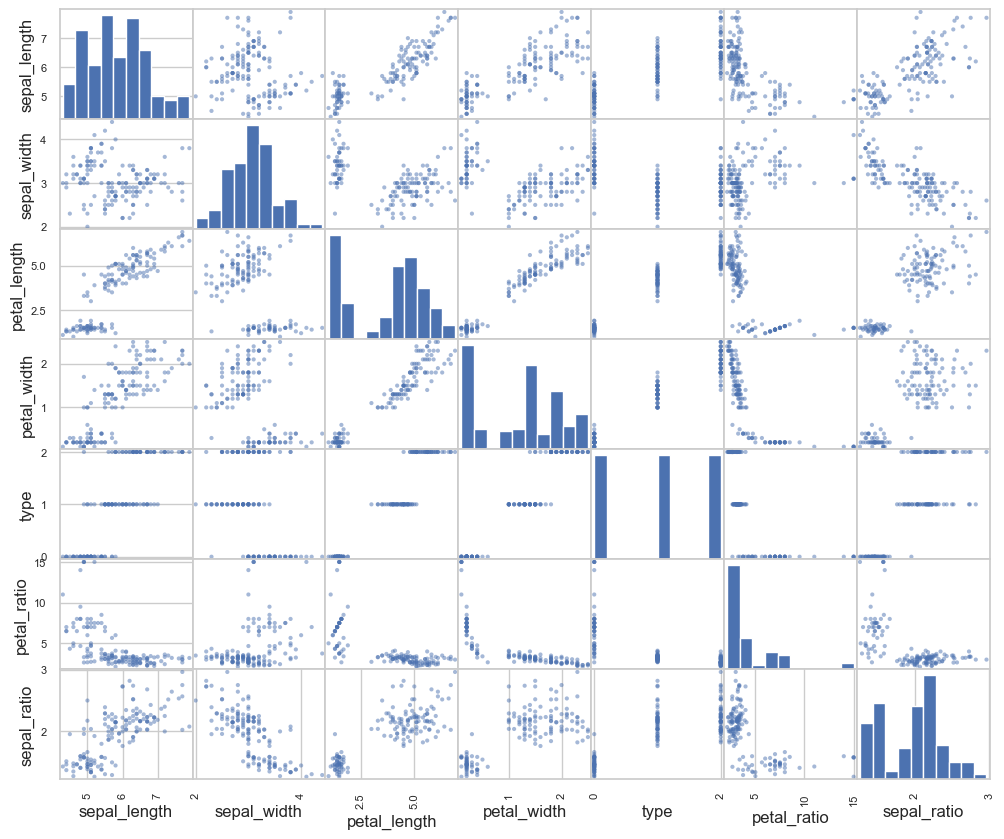

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_data,figsize=(12,10))

<Axes: xlabel='petal_length', ylabel='petal_width'>

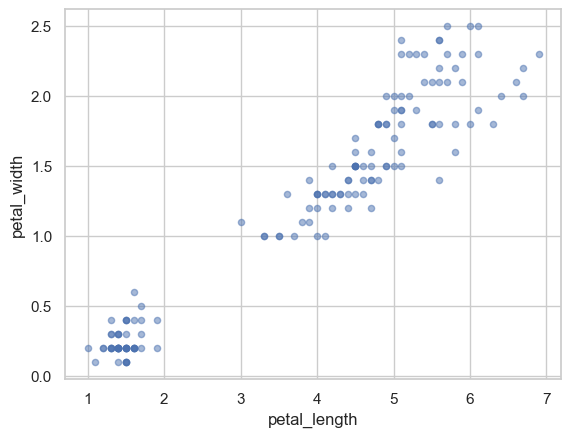

In [30]:
iris_data.plot(kind="scatter",x="petal_length",y="petal_width",alpha=0.5)

COMBINING ATTRIBUTE CORRELATION

In [31]:
corr_mat=iris_data.corr()
corr_mat["petal_width"].sort_values(ascending=False)

petal_width     1.000000
petal_length    0.962757
type            0.956464
sepal_length    0.817954
sepal_ratio     0.751725
sepal_width    -0.356544
petal_ratio    -0.734370
Name: petal_width, dtype: float64

In [32]:
corr_mat["sepal_width"].sort_values(ascending=False)

sepal_width     1.000000
petal_ratio     0.320919
sepal_length   -0.109369
petal_width    -0.356544
type           -0.419446
petal_length   -0.420516
sepal_ratio    -0.743521
Name: sepal_width, dtype: float64

In [33]:
iris_data.groupby("type").mean()

,sepal_length,sepal_width,petal_length,petal_width,petal_ratio,sepal_ratio
type,,,,,,
0,5.006,3.418,1.464,0.244,7.078000,1.474578
1,5.936,2.770,4.260,1.326,3.242837,2.160402
2,6.588,2.974,5.552,2.026,2.780662,2.230453


In [34]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train.values, y_train.values)

In [35]:
X_train_pred = clf.predict(X_train.values)
train_acc=accuracy_score(y_train.values,X_train_pred)

In [36]:
print(f"accuracy for train: {train_acc}")

accuracy for train: 1.0


In [37]:
X_test_pred = clf.predict(X_test.values)
test_acc=accuracy_score(y_test.values,X_test_pred)

In [38]:
print(f"accuracy for test: {test_acc}")

accuracy for test: 0.9666666666666667


 # BUILDING A PREDICTIVE SYSTEM

In [39]:
for i,j in d.items():
    print(f" int - {i} : labels - {j}")

 int - 0 : labels - Iris-setosa
 int - 1 : labels - Iris-versicolor
 int - 2 : labels - Iris-virginica


In [44]:
input_data = np.asarray((6.1,3.0,4.9,1.8,2.722222,2.033333))# defining example array
input_data_reshaped=input_data.reshape(1,-1)
prediction=clf.predict(input_data_reshaped)
if(prediction == 0):
    print("Output: Iris-setosa")
elif(prediction == 1):
    print("Output: Iris-versicolor")
else:
    print("Output: Iris-virginica")

print("Expected label : 2 that is Iris-virginica ")

Output: Iris-virginica
Expected label : 2 that is Iris-virginica 
